# Fitbit Progress

#### Katriona Goldmann

This script looks at the general activity of the user. Inspired by by [Stephen Hsu's analysis](https://towardsdatascience.com/collect-your-own-fitbit-data-with-python-ff145fa10873) ([code here](https://github.com/stephenjhsu/fitbit/blob/master/Fitbit%20Exploration.ipynb)) and [Matt's Gamification of fitbit](https://towardsdatascience.com/the-gamification-of-fitbit-how-an-api-provided-the-next-level-of-training-eaf7b267af00).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import plotly.io as pio

%matplotlib inline

## Read in the data and merge

In [2]:
ex = pd.read_csv("./Outputs/exercise.csv")
summary = pd.read_csv("./Outputs/daily_summary.csv")
sleep = pd.read_csv("./Outputs/sleep_summary.csv")

In [3]:
daily = pd.merge(summary, sleep, how='outer', left_on='date', right_on='Date')

In [4]:
daily = daily.drop(['Unnamed: 0_x', 'Date', 'Unnamed: 0_y'], axis=1)

## Plot trends over time

Create a trace for each parameter and normalise to 1 so it plots on one scale.

In [5]:
traces = []
omit_vars = [daily.columns.get_loc(c) for c in daily.columns if c in \
             ['date', 'Peak (mins at HR)', 'Bedtime (mins)', 'Wake up (mins)', 'Total time']]

for i in [ind for ind in range(1,len(daily.columns)) if ind not in omit_vars]:
    var = list(daily.columns.values)[i]
    xval = daily['date'][np.logical_not(np.isnan(daily[var]))]
    ynorm = [x for x in daily[var] if str(x) != 'nan'] 
    
    ynorm= [float(i)/max(ynorm) for i in ynorm]
    
    vis = True if var in ['caloriesOut', 'lightlyActiveMinutes', 'steps','veryActiveMinutes'] else "legendonly"
    traces.append(go.Scatter(x = xval, y=ynorm, text = daily[var], mode = 'lines', name=var, visible= vis, hoverinfo='text'))

In [6]:
layout = go.Layout(title='Daily Activity',yaxis = dict(showline=False, ticks='', showticklabels=False))
fig = go.Figure(traces, layout)
py.iplot(fig, filename='Daily-Activity')

In [9]:
pio.write_image(fig, './figs/daily_activity.png')

-----

## How do these correlate?

In [10]:
import scipy
import scipy.cluster.hierarchy as sch

corrd = daily.corr()
corrd = corrd.dropna(0, 'all')
corrd = corrd.dropna(1, 'all')

# cluster
X = corrd.values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [corrd.columns.tolist()[i] for i in list((np.argsort(ind)))]
corrd = corrd.reindex(columns, axis=1)
corrd = corrd.reindex(columns, axis=0)

corrd

,Fat Burn (mins at HR),caloriesOut,fairlyActiveMinutes,steps,veryActiveMinutes,Cardio (mins at HR),Out of Range/low (mins at HR),lightlyActiveMinutes,Total time,Time asleep (mins),Time awake (mins),Time in bed (mins),Time very awake (mins),restingHeartRate,sedentaryMinutes
Fat Burn (mins at HR),1.000000,0.641391,0.379514,0.686919,0.795124,0.229742,0.352835,0.056163,-0.334681,-0.259283,-0.231597,-0.270301,-0.061459,0.088906,-0.211897
caloriesOut,0.641391,1.000000,0.565821,0.934830,0.607985,0.272735,0.078538,0.764882,-0.076872,-0.302181,-0.077968,-0.307945,-0.303799,0.101712,-0.594395
fairlyActiveMinutes,0.379514,0.565821,1.000000,0.633101,0.302949,-0.131848,0.235910,0.320439,-0.013197,-0.161215,-0.298290,-0.177402,0.041194,0.219759,-0.286510
steps,0.686919,0.934830,0.633101,1.000000,0.677372,-0.024743,0.070323,0.612339,-0.117116,-0.327432,-0.006971,-0.324100,-0.225389,0.270390,-0.487105
veryActiveMinutes,0.795124,0.607985,0.302949,0.677372,1.000000,0.183389,0.171748,0.000189,-0.347407,-0.249418,-0.198489,-0.261622,-0.162022,0.178978,-0.285018
Cardio (mins at HR),0.229742,0.272735,-0.131848,-0.024743,0.183389,1.000000,0.050511,0.141342,-0.114612,0.179607,-0.257391,0.148685,-0.132573,-0.245249,-0.212026
Out of Range/low (mins at HR),0.352835,0.078538,0.235910,0.070323,0.171748,0.050511,1.000000,-0.110804,0.028226,0.183419,-0.064446,0.174916,0.087919,-0.145058,-0.371705
lightlyActiveMinutes,0.056163,0.764882,0.320439,0.612339,0.000189,0.141342,-0.110804,1.000000,0.247538,-0.181811,0.172300,-0.172190,-0.300716,-0.163359,-0.562089
Total time,-0.334681,-0.076872,-0.013197,-0.117116,-0.347407,-0.114612,0.028226,0.247538,1.000000,-0.049083,-0.015589,-0.053168,-0.135209,-0.346876,-0.046812
Time asleep (mins),-0.259283,-0.302181,-0.161215,-0.327432,-0.249418,0.179607,0.183419,-0.181811,-0.049083,1.000000,0.250973,0.996034,0.344169,-0.384163,-0.503314


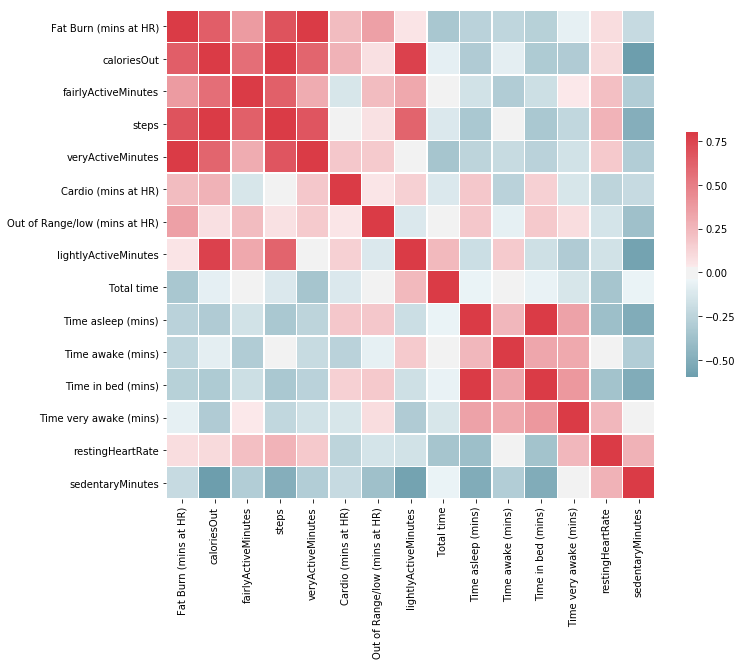

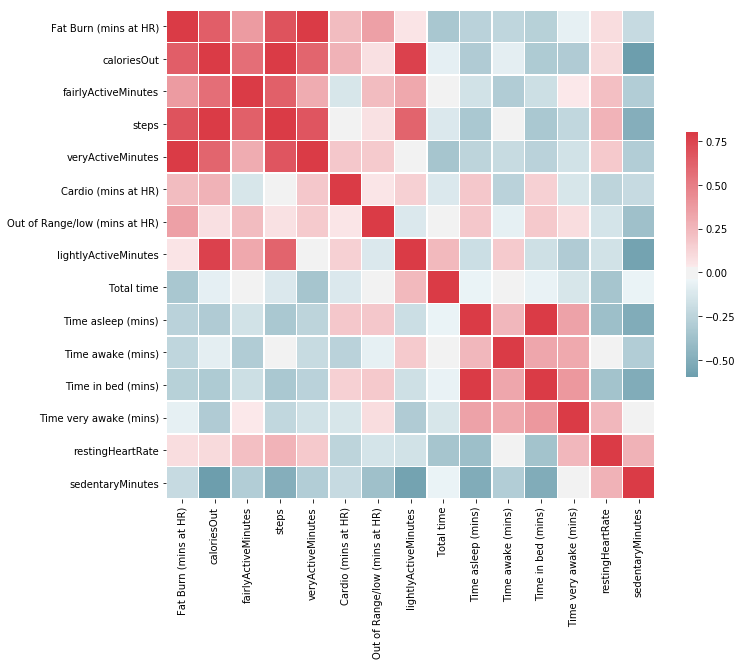

In [11]:
anchor_val = .8

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig_corr = sns.heatmap(corrd,  cmap=cmap, vmax=anchor_val,square=True, center=0, \
            xticklabels=True, yticklabels=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

fig = fig_corr.get_figure()
fig

In [13]:
fig.savefig("./figs/Correlations.png") 

-----

## Now lets look at sleep

The gold line indicates the desired 8 hours of sleep

In [14]:
trace1 = go.Bar(x=daily['date'],y=daily['Time asleep (mins)']/60,name='Asleep')
trace2 = go.Bar(x=daily['date'],y=daily['Time awake (mins)']/60,name='Awake')
trace3 = go.Bar(x=daily['date'],y=daily['Time very awake (mins)']/60,name='Very Awake')

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='stack', title="Hours in bed", shapes=[
        {'type': 'line','x0': daily['date'][0],'y0': 8,'x1': daily['date'][len(daily['date'])-1],'y1': 8, 
        'line': {'color': 'gold','width': 3},},
    ])

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [15]:
pio.write_image(fig, './figs/sleep_dist.png')

In [16]:
print('Only getting the full 8 hours ' + \
      str(round(100*len([x for x in daily['Time asleep (mins)'] if x > 8*60])/len(daily['Time asleep (mins)']))) + \
      '% of the time')

Only getting the full 8 hours 44% of the time
